In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import math
from scipy import stats
import seaborn as sns

In [2]:
data = pd.read_csv('../ゼミ関係/ゲーム分析①.csv.csv', encoding='utf-8', index_col=0)
data

,攻撃,得点,TO,ミドル,ロング,サイド,ピヴォット,カットイン,その他,国,度数
攻撃回,,,,,,,,,,,
1,セット,0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,日本,1
2,セット,1,NaN,NaN,NaN,NaN,NaN,1.0,NaN,日本,1
3,セット,1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,日本,1
4,速攻,0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,日本,1
5,セット,0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,日本,1
...,...,...,...,...,...,...,...,...,...,...,...
225,速攻,0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,EHF,1
226,速攻,0,NaN,NaN,NaN,NaN,NaN,NaN,1,EHF,1
227,セット,1,NaN,NaN,NaN,NaN,0.0,NaN,1,EHF,1


In [3]:
set_data = data.loc[data['攻撃']=='セット']
set_data

,攻撃,得点,TO,ミドル,ロング,サイド,ピヴォット,カットイン,その他,国,度数
攻撃回,,,,,,,,,,,
1,セット,0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,日本,1
2,セット,1,NaN,NaN,NaN,NaN,NaN,1.0,NaN,日本,1
3,セット,1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,日本,1
5,セット,0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,日本,1
8,セット,0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,日本,1
...,...,...,...,...,...,...,...,...,...,...,...
222,セット,1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,EHF,1
223,セット,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,EHF,1
224,セット,1,NaN,NaN,NaN,NaN,1.0,NaN,NaN,EHF,1


In [4]:
table = pd.pivot_table(set_data, columns='国', index='得点', values='攻撃', aggfunc='count')
table

国,EHF,日本
得点,,
0,44,48
1,42,33


In [5]:
n_ehf = 44 + 42
x_ehf = 42
n_japan = 48 + 33
x_japan = 33
p_ehf = x_ehf / n_ehf
p_japan = x_japan / n_japan
p_hat = (n_ehf*p_ehf + n_japan*p_japan) / (n_ehf + n_japan)

z = (p_ehf - p_japan) / math.sqrt(p_hat*(1-p_hat)*(1/n_ehf+1/n_japan))
print('母比率の差の統計検定量=',z)

母比率の差の統計検定量= 1.0512864313276165


In [6]:
alpha = 0.05 # 有意水準
z_value = stats.norm.ppf(1-alpha)

if z < z_value:
    print('有意差なし')
else:
    print('有意差あり')

有意差なし


In [7]:
set_data['TO'].fillna(0, inplace=True)
table = pd.pivot_table(set_data, columns='国', index='TO', values='攻撃', aggfunc='count')
table

C:\Users\koyo\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


国,EHF,日本
TO,,
0.0,65,61
1.0,21,20


In [8]:
n_ehf = 65 + 21
x_ehf = 21
n_japan = 61 + 20
x_japan = 20
p_ehf = x_ehf / n_ehf
p_japan = x_japan / n_japan
p_hat = (n_ehf*p_ehf + n_japan*p_japan) / (n_ehf + n_japan)

z = (p_japan - p_ehf) / math.sqrt(p_hat*(1-p_hat)*(1/n_ehf+1/n_japan))
print('母比率の差の統計検定量=',z)

母比率の差の統計検定量= 0.04093010893786847


In [9]:
alpha = 0.05 # 有意水準
z_value = stats.norm.ppf(1-alpha)

if z < z_value:
    print('有意差なし')
else:
    print('有意差あり')

有意差なし


# 普通の分析

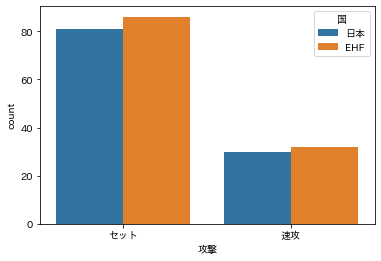

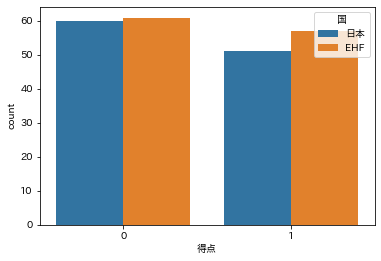

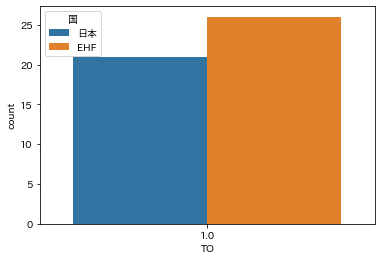

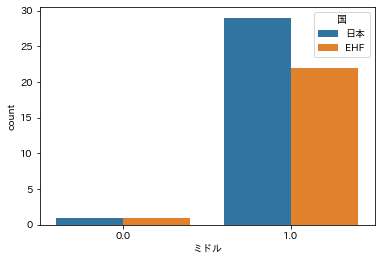

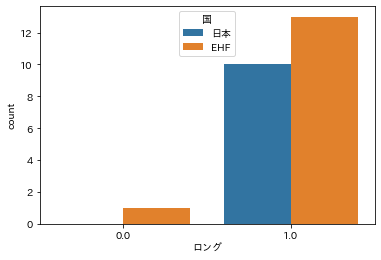

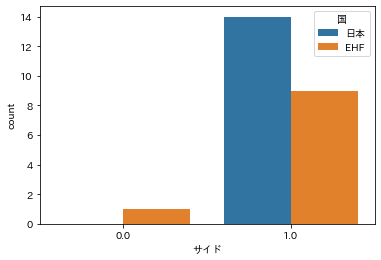

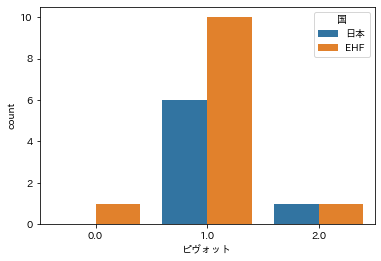

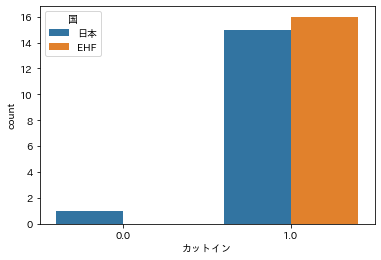

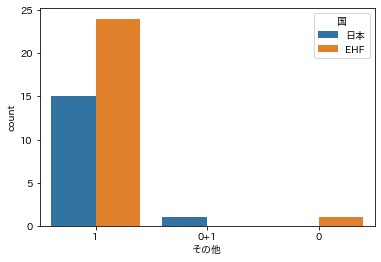

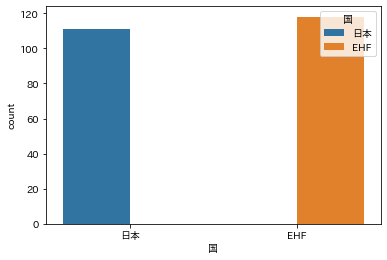

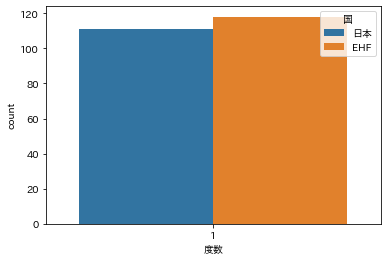

In [17]:
for i in data.columns:
    sns.countplot(x=i, hue='国', data=data)
    plt.show()

In [ ]:
sns.countplot()